In [197]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [198]:
dir(iris)


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [199]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [200]:
df.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')

In [201]:
df['target'] = iris.target

In [202]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [203]:
X = df.drop('target',axis='columns')
y = df.target

In [204]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [205]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [207]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [208]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [209]:
y_pred = model.predict(X_test)

In [210]:
model.score(X_test, y_test)

0.9333333333333333

In [211]:
model.score(X_train, y_train)

1.0

In [212]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  2],
       [ 0,  0,  7]])

Text(69,0.5,'Truth')

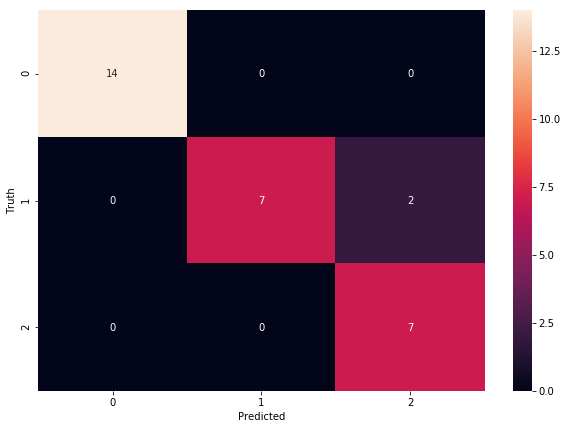

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [214]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)

,Actual,Predicted
85,1,1
77,1,2
34,0,0
72,1,1
78,1,1
18,0,0
50,1,1
110,2,2
3,0,0
14,0,0


In [215]:
model.predict([[3, 5, 4, 2]])

array([1])

# Finding Important Features in Scikit-learn

In [216]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.449776
petal width (cm)     0.351273
sepal length (cm)    0.170479
sepal width (cm)     0.028472
dtype: float64

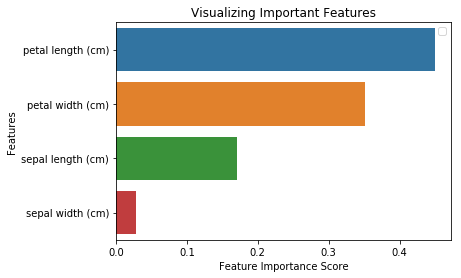

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [218]:
# Import train_test_split function
# Split dataset into features and labels
X=df[['petal length (cm)', 'petal width (cm)','sepal length (cm)']]  # Removed feature "sepal length"
y=df['target']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [219]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9523809523809523)


Removing the least important features (sepal length), the accuracy gets increased. 
This is because you removed misleading data and noise, resulting in an increased accuracy. 
A lesser amount of features also reduces the training time.